# To predict the values of single unit properties using the observations from 2017.

In [1]:
import env
import wrangle

In [2]:
zillow = wrangle.get_zillow()

this file exists, reading from csv


In [6]:
zillow.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 2982285 entries, 0 to 2982284
Data columns (total 9 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   bedroomcnt                    2982272 non-null  float64
 1   bathroomcnt                   2982260 non-null  float64
 2   calculatedfinishedsquarefeet  2940120 non-null  float64
 3   structuretaxvaluedollarcnt    2938753 non-null  float64
 4   taxvaluedollarcnt             2950951 non-null  float64
 5   yearbuilt                     2937384 non-null  float64
 6   taxamount                     2962465 non-null  float64
 7   fips                          2982285 non-null  float64
 8   propertylandusedesc           2982285 non-null  object 
dtypes: float64(8), object(1)
memory usage: 227.5+ MB


In [3]:
zillow = wrangle.prep_zillow(zillow)

/Users/kelseyyu/Desktop/Codeup/codeup-data-science/regression-exercises/wrangle.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zillow['FIPS'] = zillow['FIPS'].replace(class_mapping)


In [4]:
zillow.head()

,Bedroom Count,Bathroom Count,Finished Square Feet,Structure Tax Value,Tax Value,Year Built,Tax Amount,FIPS,Property Land Use
2,0.0,0.0,73026.0,660680.0,1434941.0,1959.0,20800.37,LA County,Store/Office (Mixed Use)
3,0.0,0.0,5068.0,580059.0,1174475.0,1948.0,14557.57,LA County,Store/Office (Mixed Use)
4,0.0,0.0,1776.0,196751.0,440101.0,1947.0,5725.17,LA County,Commercial/Office/Residential Mixed Used
5,0.0,0.0,2400.0,179072.0,287634.0,1943.0,3661.28,LA County,Commercial/Office/Residential Mixed Used
7,0.0,0.0,3611.0,103553.0,698984.0,1946.0,7857.84,LA County,Commercial/Office/Residential Mixed Used


In [5]:
wrangle.split_zillow(zillow)

(         Bedroom Count  Bathroom Count  Finished Square Feet  \
 793199             3.0             2.0                1433.0   
 1094025            4.0             1.0                2338.0   
 1272586            3.0             3.0                1980.0   
 96098              6.0             3.0                2232.0   
 990846             7.0             4.0                2578.0   
 ...                ...             ...                   ...   
 2009950            3.0             2.0                1661.0   
 1276046            1.0             2.0                1117.0   
 28810              4.0             3.0                2743.0   
 285907             3.0             2.0                1322.0   
 795717             2.0             2.0                1592.0   
 
          Structure Tax Value  Tax Value  Year Built  Tax Amount  \
 793199              123152.0   239685.0      1977.0     3226.89   
 1094025              36225.0    92119.0      1915.0     1807.37   
 1272586      

In [11]:
zillow.columns

Index(['Bedroom Count', 'Bathroom Count', 'Finished Square Feet',
       'Structure Tax Value', 'Tax Value', 'Year Built', 'Tax Amount', 'FIPS',
       'Property Land Use'],
      dtype='object')

# Exploration

In [6]:
import pandas as pd
columns = ['Bedroom Count', 'Bathroom Count', 'Finished Square Feet',
       'Structure Tax Value', 'Tax Value', 'Year Built', 'Tax Amount', 'FIPS',
       'Property Land Use']

for i in columns:
    nan_count = zillow[i].isnull().sum()
    nan_percentage = (nan_count / len(zillow)) * 100
    print(f"Column '{i}': {nan_count} NaN values,({nan_percentage:.4f}%)")

Column 'Bedroom Count': 0 NaN values,(0.0000%)
Column 'Bathroom Count': 0 NaN values,(0.0000%)
Column 'Finished Square Feet': 0 NaN values,(0.0000%)
Column 'Structure Tax Value': 0 NaN values,(0.0000%)
Column 'Tax Value': 0 NaN values,(0.0000%)
Column 'Year Built': 0 NaN values,(0.0000%)
Column 'Tax Amount': 0 NaN values,(0.0000%)
Column 'FIPS': 0 NaN values,(0.0000%)
Column 'Property Land Use': 0 NaN values,(0.0000%)


Bedroom Count


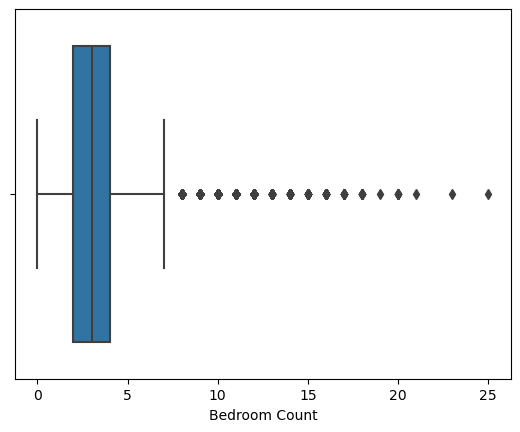

Bedroom Count
0.0       45281
1.0       86412
2.0      604618
3.0     1170236
4.0      729673
5.0      182108
6.0       48503
7.0       12647
8.0       13274
9.0        4213
10.0       1669
11.0        415
12.0        939
13.0         83
14.0         64
15.0         22
16.0         47
17.0         11
18.0          9
19.0          1
20.0          6
21.0          1
23.0          1
25.0          1
Name: count, dtype: int64

Bathroom Count


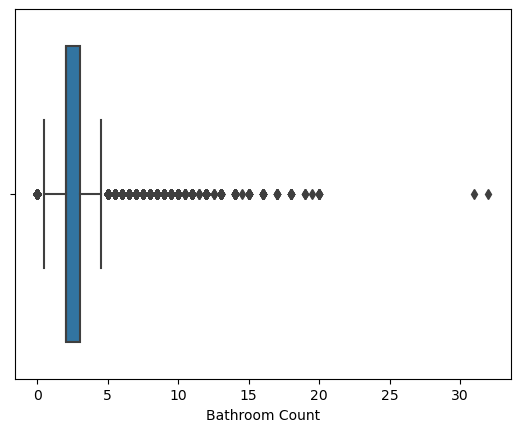

Bathroom Count
0.00       40143
0.50          16
1.00      496810
1.50       45657
1.75           4
2.00     1217150
2.50      208489
3.00      631594
3.50       31764
4.00      132874
4.50       19830
5.00       38320
5.50        6259
6.00       16300
6.50        1347
7.00        6182
7.50         383
8.00        4490
8.50         111
9.00        1323
9.50          50
10.00        487
10.50         14
11.00        198
11.50          3
12.00        264
12.50          3
13.00         53
14.00         39
14.50          1
15.00         20
16.00         23
17.00          8
18.00         12
19.00          3
19.50          1
20.00          7
31.00          1
32.00          1
Name: count, dtype: int64

Finished Square Feet


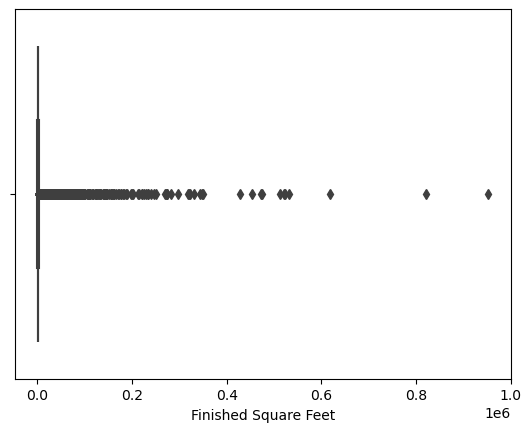

Finished Square Feet
1.0         8
2.0         5
3.0         9
4.0         1
6.0         1
           ..
522511.0    1
531118.0    1
617114.0    1
820242.0    1
952576.0    1
Name: count, Length: 12542, dtype: int64

Structure Tax Value


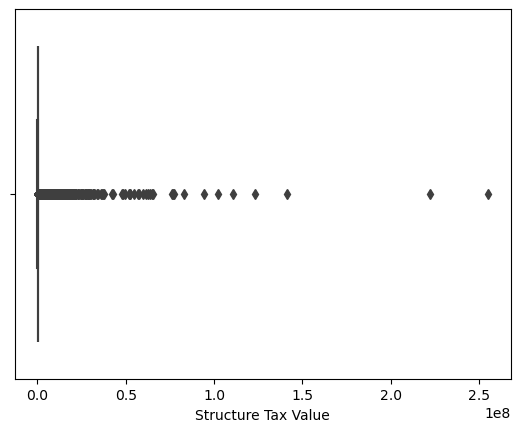

Structure Tax Value
9.0            30
10.0           18
29.0            1
37.0            1
39.0            4
               ..
110857349.0     1
123371992.0     1
141417470.0     1
222334475.0     1
255321161.0     1
Name: count, Length: 428558, dtype: int64

Tax Value


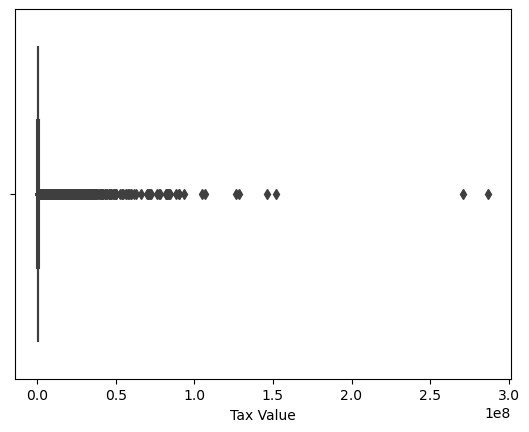

Tax Value
23.0           6
31.0           1
34.0           1
46.0           1
100.0          1
              ..
128060323.0    1
146257183.0    1
151895087.0    1
271004605.0    1
287098486.0    1
Name: count, Length: 645346, dtype: int64

Year Built


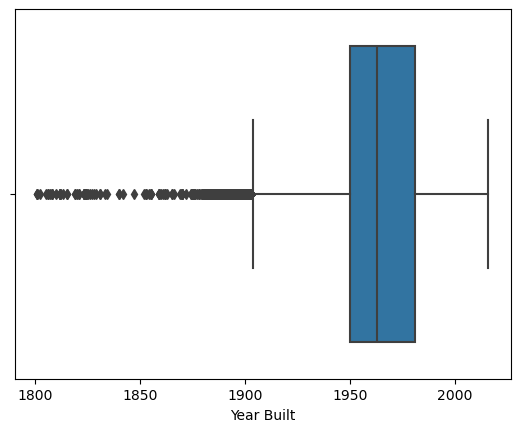

Year Built
1801.0       3
1802.0       1
1805.0       1
1806.0       2
1807.0       1
          ... 
2012.0    6638
2013.0    8945
2014.0    8749
2015.0    6152
2016.0     162
Name: count, Length: 183, dtype: int64

Tax Amount


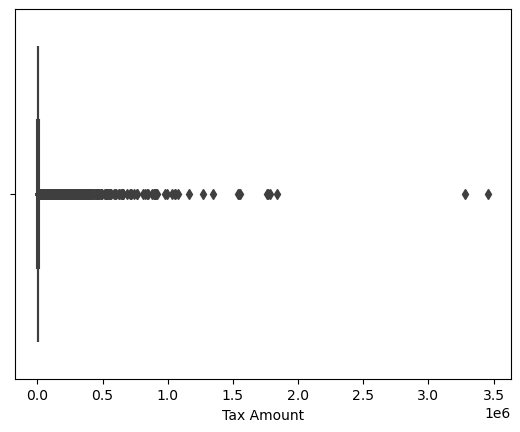

Tax Amount
5.04          1
6.34          1
7.04          1
9.04          1
11.94         1
             ..
1765815.87    1
1783886.44    1
1840935.06    1
3277055.20    1
3458861.12    1
Name: count, Length: 1026497, dtype: int64

FIPS


TypeError: Horizontal orientation requires numeric `x` variable.

In [12]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

for col in zillow.columns[:-1]:
    print(col)
    sns.boxplot(data=zillow, x=col)
    plt.show()
    
    print(zillow[col].value_counts().sort_index())
    print()

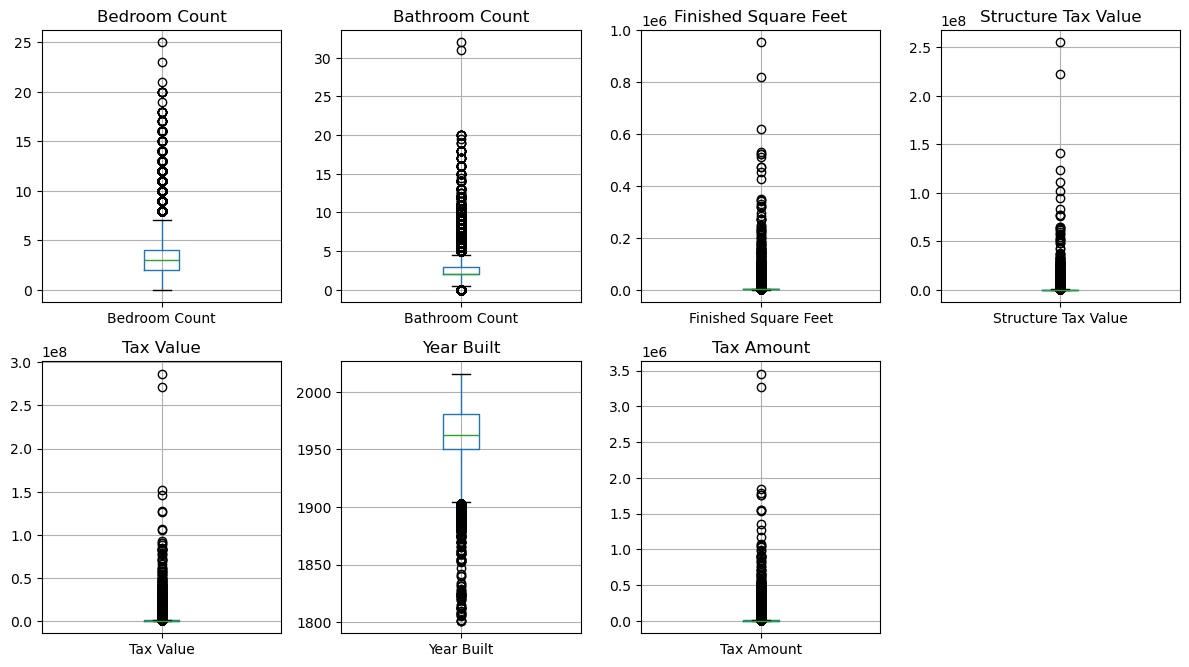

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your DataFrame is named 'zillow'
columns_to_plot = ['Bedroom Count', 'Bathroom Count', 'Finished Square Feet',
       'Structure Tax Value', 'Tax Value', 'Year Built', 'Tax Amount']

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(12, 10))

# Flatten the axes array for easier iteration
axes = axes.flatten()

for i, column in enumerate(columns_to_plot):
    zillow.boxplot(column=column, ax=axes[i])
    axes[i].set_title(column)

# Remove any unused subplots
for j in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


zillow['Finished Square Feet'].describe()

In [19]:
zillow = zillow.dropna()

In [20]:
zillow.isna().sum()

Bedroom Count           0
Bathroom Count          0
Finished Square Feet    0
Structure Tax Value     0
Tax Value               0
Year Built              0
Tax Amount              0
FIPS                    0
Property Land Use       0
dtype: int64

In [21]:
print(zillow['FIPS'].value_counts())
print('6037: LA County')
print('6059: Orange County')
print('6111: Ventura County')


FIPS
6037.0    1969549
6059.0     717696
6111.0     212989
Name: count, dtype: int64
6037: LA County
6059: Orange County
6111: Ventura County


In [22]:
class_mapping = {6037: 'LA County', 6059: 'Orange County', 6111: 'Ventura County'}

In [23]:
zillow['FIPS'] = zillow['FIPS'].replace(class_mapping)

In [24]:
zillow.head()

,Bedroom Count,Bathroom Count,Finished Square Feet,Structure Tax Value,Tax Value,Year Built,Tax Amount,FIPS,Property Land Use
2,0.0,0.0,73026.0,660680.0,1434941.0,1959.0,20800.37,LA County,Store/Office (Mixed Use)
3,0.0,0.0,5068.0,580059.0,1174475.0,1948.0,14557.57,LA County,Store/Office (Mixed Use)
4,0.0,0.0,1776.0,196751.0,440101.0,1947.0,5725.17,LA County,Commercial/Office/Residential Mixed Used
5,0.0,0.0,2400.0,179072.0,287634.0,1943.0,3661.28,LA County,Commercial/Office/Residential Mixed Used
7,0.0,0.0,3611.0,103553.0,698984.0,1946.0,7857.84,LA County,Commercial/Office/Residential Mixed Used
